## `PCA Practical implementation`

- Here we will work on the **`MNIST`** dataset, where we will first classify the handwritten images without applying **`PCA`** and then with applying **`PCA`** on the dataset.
- In the **`MNIST`** dataset, each picture is consist of **`28 X 28`** pixels. So in total there are **`784`** pixels. 
- So here each pixel is treated as one column.
- **`PCA`** does not work when data is aligned in a `circle` (number of data in both X and Y axis are similar), or the data is distributed in such a way that there is a pattern in the datapoints in higher dimension like `sine curve`.

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np
import time

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# For PCA part
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [2]:
# importing the data

df = pd.read_csv('datasets/mnist_train.csv')
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [3]:
# So there are 42000 rows each of 784 columns 

df.shape

(42000, 785)

In [4]:
# taking any row at random

df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
26523      1       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
26523       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
26523         0         0         0         0         0  

[1 rows x 785 columns]

In [5]:
# Checking the values of the random row

df.iloc[26523,1:].values

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,  80, 253,  49,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

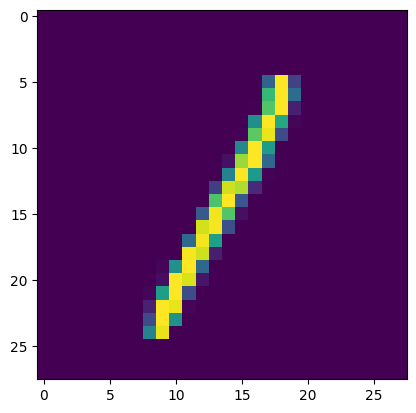

In [6]:
# Checking the row's image
# So it is the image of digit 1

plt.imshow(df.iloc[26523,1:].values.reshape(28,28))
plt.show()

**Here we will do without using `PCA`**

In [7]:
# Creating independent and dependent variables

X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
# Now doing train test split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((33600, 784), (8400, 784))

In [9]:
# Now using KNN algorithms to create group of images of similar kind and then find their labels

knn = KNeighborsClassifier()

knn.fit(X_train, y_train)

KNeighborsClassifier()

**Notes:**

- Here the **`KNN`** will take some time as in this case the algorithm is trying to calculate the distance of one given point from other **`33600`** points in **`784`** dimensional spaces. 
- Then by sorting the values it tries to find out the nearest neighbors, and then find their **`labels`**.
- So we will use the timer to see how much time it consumes, so later we can check it with **`PCA`** to see for faster execution.

In [10]:
start = time.time()
y_pred = knn.predict(X_test)
end = time.time()

print(f"So total time taken in this method is {end - start} seconds.")

So total time taken in this method is 17.603802919387817 seconds.


In [11]:
acc1 = accuracy_score(y_test, y_pred)

print(f"The accuracy of the model without using PCA is {(acc1)*100:.2f}%")

The accuracy of the model without using PCA is 96.49%


**Now we will do the same with `PCA`**

- Here 1st we need to `Standardize` the data.
- Then we will use `PCA` to reduce the dimensions.
- Then again we will use the `KNN` algorithm to grouping.
- Then do prediction and checking accuracy.

In [12]:
# Standardizing the data

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Using PCA
# here 'n_components' to state number of Principal Components we want
# As here we pass 200 so the number of dimensions will be the top 200

pca = PCA(n_components=200)

X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

X_train_trf.shape, X_test_trf.shape

((33600, 200), (8400, 200))

In [14]:
# But the actual dataset's shape remained same

X_train.shape

(33600, 784)

In [15]:
# Again using KNN classifier

knn = KNeighborsClassifier()

knn.fit(X_train_trf, y_train)

KNeighborsClassifier()

In [16]:
start = time.time()
y_pred1 = knn.predict(X_test_trf)
end = time.time()

print(f"So total time taken in this method is {end - start} seconds.")

So total time taken in this method is 3.714587926864624 seconds.


**Notes**

- So now the time taked reduced to `4` seconds from `19` seconds after reducing the dimensions using `PCA`.

In [17]:
acc2 = accuracy_score(y_test, y_pred1)

print(f"The accuracy of the model with using PCA is {(acc2)*100:.2f}%")

The accuracy of the model with using PCA is 95.04%


In [18]:
# Here we will see accuracy for all the 784 dimensions through a for loop
# Here we will pass the n_components through the loop from 1 to 784 dimensions
# It is time consuming
# So here we are printing only the 1st 49 dimensions

for i in range(1,785):
    if i == 50:
        break
    
    pca = PCA(n_components=i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trf = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf, y_train)
    
    y_pred = knn.predict(X_test_trf)
    
    acc = accuracy_score(y_test, y_pred)
    print(f"The accuracy of the model with {i} dimensions is: {(acc)*100:.2f}%")

The accuracy of the model with 1 dimensions is: 25.79%
The accuracy of the model with 2 dimensions is: 32.43%
The accuracy of the model with 3 dimensions is: 51.06%
The accuracy of the model with 4 dimensions is: 66.64%
The accuracy of the model with 5 dimensions is: 73.74%
The accuracy of the model with 6 dimensions is: 82.30%
The accuracy of the model with 7 dimensions is: 84.33%
The accuracy of the model with 8 dimensions is: 87.18%
The accuracy of the model with 9 dimensions is: 88.64%
The accuracy of the model with 10 dimensions is: 90.50%
The accuracy of the model with 11 dimensions is: 91.20%
The accuracy of the model with 12 dimensions is: 91.64%
The accuracy of the model with 13 dimensions is: 92.82%
The accuracy of the model with 14 dimensions is: 93.50%
The accuracy of the model with 15 dimensions is: 93.86%
The accuracy of the model with 16 dimensions is: 93.92%
The accuracy of the model with 17 dimensions is: 94.02%
The accuracy of the model with 18 dimensions is: 94.06%
T

**Now we will visualize the data in `2D` and `3D`**

In [19]:
# Creating 2d

pca = PCA(n_components=2)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

X_train_trf.shape, X_test_trf.shape

((33600, 2), (8400, 2))

In [29]:
# Visualizing
# Here we see 784 dimensions in 2d

import plotly.graph_objects as go

y_train_trf = y_train.astype(str)

fig = go.Figure()
fig = px.scatter(x=X_train_trf[:,0],
                 y=X_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
fig.show()

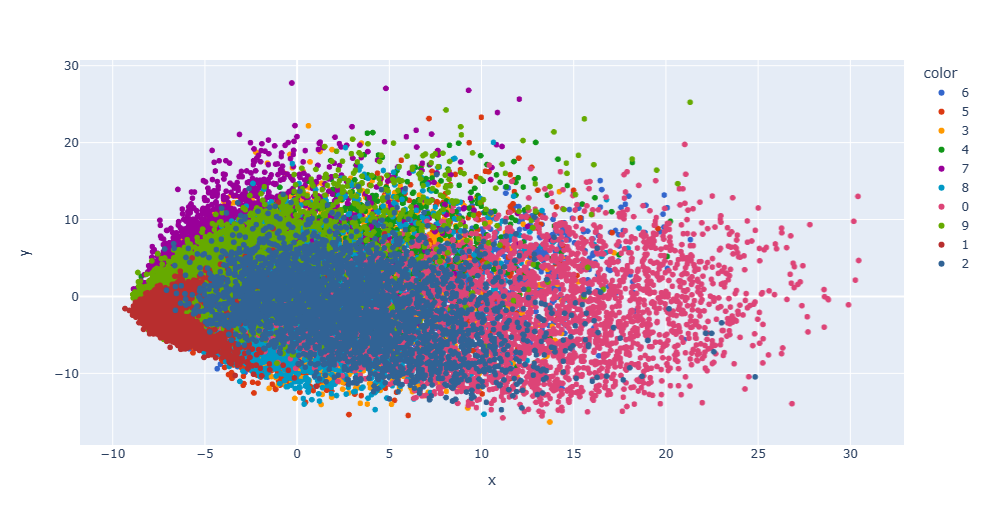

In [35]:
# Checking the image

from PIL import Image

# open method used to open different extension image file
Image.open(r"F:\\Machine Learning\\INeuron_FSDS\\Machine Learning topic\\images\\PCA_2d_plot.png") 

In [36]:
# Creating 3d

pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

X_train_trf.shape, X_test_trf.shape

((33600, 3), (8400, 3))

In [37]:
# Visualizing
# Here we see 784 dimensions in 3d

y_train_trf = y_train.astype(str)

fig1 = go.Figure()
fig1 = px.scatter_3d(df, x=X_train_trf[:,0], y=X_train_trf[:,1], z=X_train_trf[:,2],
              color=y_train_trf)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)
fig1.show()

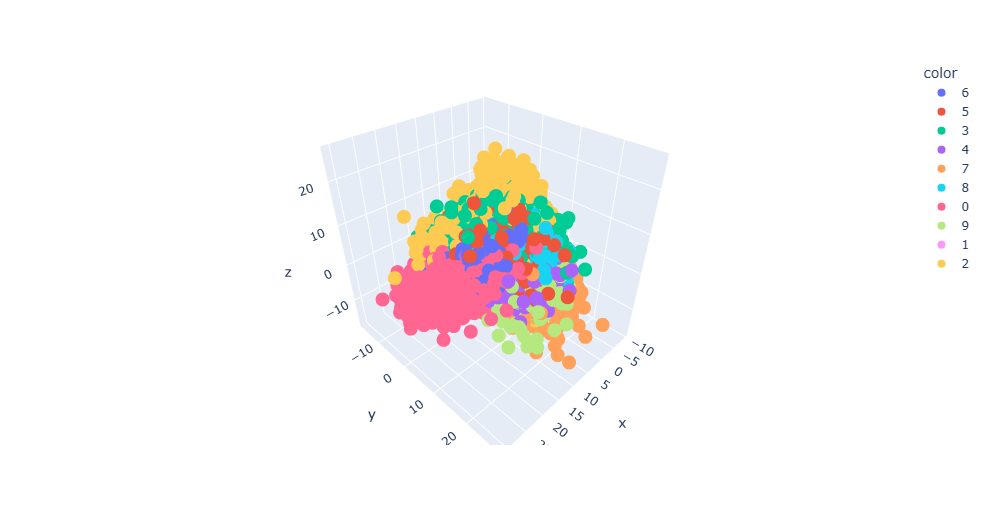

In [38]:
# Checking the image

from PIL import Image

# open method used to open different extension image file
Image.open(r"F:\\Machine Learning\\INeuron_FSDS\\Machine Learning topic\\images\\PCA_3d_plot.png") 

In [39]:
# Eigen values

pca.explained_variance_

array([40.67111198, 29.1702338 , 26.74459583])

In [40]:
# Eigen vectors

pca.components_.shape

(3, 784)

In [41]:
# Here we will find out how much percentage of Variance is explained by each vector

pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [42]:
# Now checking with dimension as None

pca = PCA(n_components=None)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

X_train_trf.shape, X_test_trf.shape

((33600, 784), (8400, 784))

In [43]:
pca.explained_variance_.shape

(784,)

In [44]:
pca.components_.shape

(784, 784)

In [45]:
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

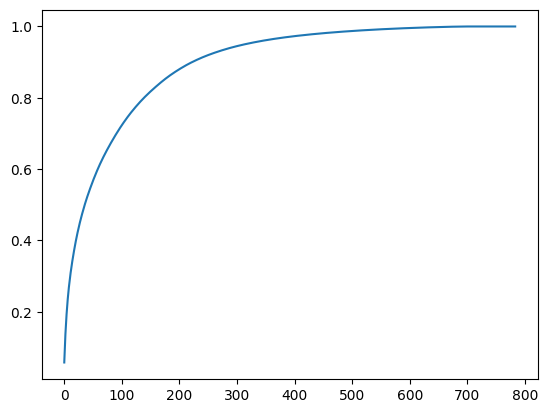

In [46]:
# usining cumulative sum() to find where we reach the 90%
# here we are visualizing

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()